<a href="https://colab.research.google.com/github/dramfin/Spotify-Song-Popularity-Prediction-ML/blob/main/Song_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

url for data set : https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: RangeError: Maximum call stack size exceeded.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Import CSV

df = pd.read_csv('dataset.csv')

print(df.head(10))

print(df.columns.values)

print(df.shape)

   Unnamed: 0                track_id                               artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5           5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6           6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7           7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8           8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9           9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   

                                          album_name  \
0                                             Comedy   
1                 

In [ ]:
#Missing Value Imputation

df.isnull().sum()

print(df.dropna())

DV = 'popularity'

df_sample1 = df.dropna(subset=[DV])

rvar_list = ['Unnamed: 0', 'track_id','album_name','track_name','key','mode'] #Not needed

df_sample1 = df.drop(columns=rvar_list)

        Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                    

In [ ]:
#Verify Columns
print(df_sample1.columns.values)

['artists' 'popularity' 'duration_ms' 'explicit' 'danceability' 'energy'
 'loudness' 'speechiness' 'acousticness' 'instrumentalness' 'liveness'
 'valence' 'tempo' 'time_signature' 'track_genre']


In [ ]:
#Organize Variables Into Categories

cvar_list = [
    'artists'
    ,'explicit'
    ,'track_genre']
nvar_list = [
    'duration_ms'
    ,'danceability'
    ,'energy'
    ,'loudness'
    ,'speechiness'
    ,'acousticness'
    ,'instrumentalness'
    ,'liveness'
    ,'valence'
    ,'tempo'
    ,'time_signature']

                  popularity  duration_ms  danceability    energy  loudness  \
popularity          1.000000    -0.007101      0.035448  0.001056  0.050423   
duration_ms        -0.007101     1.000000     -0.073426  0.058523 -0.003470   
danceability        0.035448    -0.073426      1.000000  0.134325  0.259077   
energy              0.001056     0.058523      0.134325  1.000000  0.761690   
loudness            0.050423    -0.003470      0.259077  0.761690  1.000000   
speechiness        -0.044927    -0.062600      0.108626  0.142509  0.060826   
acousticness       -0.025472    -0.103788     -0.171533 -0.733906 -0.589803   
instrumentalness   -0.095139     0.124371     -0.185606 -0.181879 -0.433477   
liveness           -0.005387     0.010321     -0.131617  0.184796  0.076899   
valence            -0.040534    -0.154479      0.477341  0.258934  0.279848   
tempo               0.013205     0.024346     -0.050450  0.247851  0.212446   
time_signature      0.031073     0.018225      0.207

<Axes: >

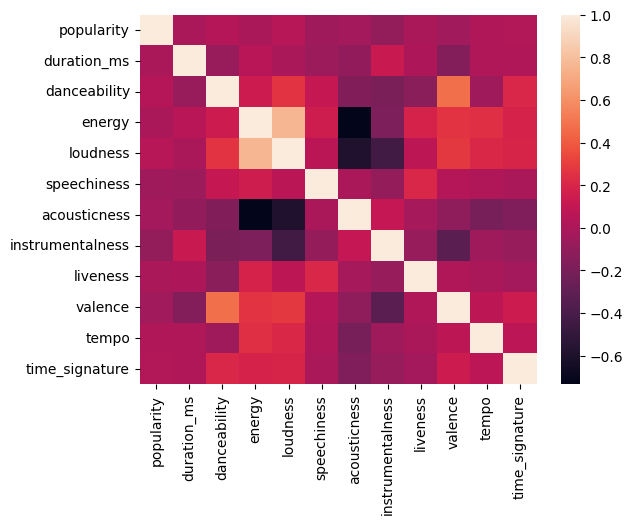

In [ ]:
dfheatmaps = df_sample1.copy()

numerical_features = dfheatmaps.select_dtypes(include=np.number).columns
corr = dfheatmaps[numerical_features].corr()

print(corr)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
#Variable Transformation

df_sample2 = df_sample1.copy()
df_sample2[nvar_list] = (df_sample1[nvar_list] - df_sample1[nvar_list].mean())/df_sample1[nvar_list].std()

df_sample3 = df_sample2.copy()
df_sample3[cvar_list] = df_sample2[cvar_list].astype('category')
df_sample3[nvar_list] = df_sample2[nvar_list].astype('float64')

df_sample4 = df_sample3.copy()

# Use Popularity to Make Unique Identtifiers for Artist, KFolds ensure no data leakage as Popularity is Target Variable
from sklearn.model_selection import KFold

df_sample4['artists_encoded'] = np.nan

kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Calculate artist popularity across the entire dataset to avoid NaNs
artist_popularity = df_sample4.groupby('artists', observed=False)['popularity'].mean()
df_sample4['artists_encoded'] = df_sample4['artists'].map(artist_popularity)

#The rest of the code remains the same.


#Track Genre Label Making

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_sample4['track_genre_encoded'] = label_encoder.fit_transform(df_sample4['track_genre'])

print(df_sample4[['track_genre', 'track_genre_encoded']].head())

  track_genre  track_genre_encoded
0    acoustic                    0
1    acoustic                    0
2    acoustic                    0
3    acoustic                    0
4    acoustic                    0


In [ ]:
# Drop redundant Columns and Verify Clean Data

df_sample5 = df_sample4.copy()

df_sample5.drop(columns=['artists','track_genre'], inplace=True)

print(df_sample5.head(10))
print(df_sample5.dtypes)
print(df_sample5.shape)

   popularity  duration_ms explicit  danceability    energy  loudness  \
0          73     0.024575    False      0.629241 -0.717145  0.300827   
1          55    -0.730856    False     -0.845904 -1.889971 -1.784736   
2          57    -0.160331    False     -0.742183 -1.122665 -0.293287   
3          71    -0.243213    False     -1.733297 -2.312984 -2.039243   
4          82    -0.271918    False      0.295029 -0.788707 -0.282749   
5          58    -0.128513    False      0.698389 -0.637631 -0.108969   
6          74     0.012776    False     -0.920814 -1.965509 -0.111951   
7          80     0.139023    False      0.784823 -0.784731 -0.213157   
8          74    -0.358033    False      0.335365 -0.904002 -0.087693   
9          56    -0.209093    False     -0.719134 -0.037303  0.296055   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
0     0.551845     -0.850198         -0.504106  0.758740  0.929302 -1.141858   
1    -0.078993      1.831724        

In [ ]:
#from google.colab import files

#df_sample5.to_csv('df_sample5.csv', encoding = 'utf-8-sig')
#files.download('df_sample5.csv')

In [ ]:
from sklearn.model_selection import train_test_split

df4partition = df_sample5
testpart_size = 0.2

df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

        popularity  duration_ms explicit  danceability    energy  loudness  \
104483          60     0.066831    False     -0.868953 -1.126640 -0.054886   
17411           39    -0.382377    False      0.646528  1.234916  1.089997   
73414           43     0.902236    False      1.136323 -1.456622 -0.703083   
95288           33     0.452049    False      1.130561  0.666393  0.656540   
77403           45    -0.122921    False     -0.125618  0.169433  0.074753   
...            ...          ...      ...           ...       ...       ...   
50057           55     0.553943    False     -0.949625  0.022332  0.202007   
98047            0    -0.622969    False     -1.110970 -2.311394 -2.055746   
5192            60    -1.400544    False     -0.523216 -2.235061 -4.009682   
77708           44    -0.287827    False      0.456373  0.765785 -0.165636   
98539           24    -0.797306    False     -2.200042 -2.289925 -2.267901   

        speechiness  acousticness  instrumentalness  liveness  

In [ ]:
# Count NaN values per column
nan_count_per_column = df_nontestData.isna().sum()

# Count total NaN values in the entire DataFrame
total_nan_count = df_nontestData.isna().sum().sum()

print("NaN count per column:")
print(nan_count_per_column)
print(f"\nTotal NaN values in the DataFrame: {total_nan_count}")


NaN count per column:
popularity             0
duration_ms            0
explicit               0
danceability           0
energy                 0
loudness               0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
artists_encoded        0
track_genre_encoded    0
dtype: int64

Total NaN values in the DataFrame: 0


In [ ]:
df_nontestData['popularity_binary'] = (df_nontestData['popularity'] >= 50).astype(int)
DV = 'popularity_binary'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=['popularity', DV])


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import numpy as np

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Log-space alphas
min_alpha = 0.001
max_alpha = 100
n_candidates = 1000
alphas = np.logspace(np.log10(min_alpha), np.log10(max_alpha), n_candidates)

# Stratified K-Fold
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Logistic Regression CV
log_reg_cv = LogisticRegressionCV(Cs=alphas, max_iter=2000, cv=kfolds, scoring='roc_auc', solver='liblinear', n_jobs=-1)
log_reg_cv.fit(X_resampled, y_resampled)

# Optimal penalty
optimal_penalty = log_reg_cv.C_[0]
print(f"Optimal penalty level (C) of the final selected model: {optimal_penalty}")

# Evaluate on the original test set (example)
y_test_actual = df_testData['popularity_binary']
X_test = df_testData.drop(columns=['popularity', 'popularity_binary'])
y_test_predicted = log_reg_cv.predict(X_test)
print(metrics.confusion_matrix(y_test_actual, y_test_predicted))
print(metrics.accuracy_score(y_test_actual, y_test_predicted))


ValueError: Input X contains NaN.
LogisticRegressionCV does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values